# Sprint 8

## Nivell 1

Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.


In [2]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
connection = mysql.connector.connect(host='localhost',
                                    database='dbsprint',
                                    user='root',
                                    password="123")

cursor = connection.cursor()
cursor.execute("SHOW TABLES")
table_list = cursor.fetchall()
for i in table_list:
    globals()[i[0]] = pd.read_sql(f"select * from {i[0]}", connection)

C:\Users\nregi\AppData\Local\Temp\ipykernel_21808\89949179.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  globals()[i[0]] = pd.read_sql(f"select * from {i[0]}", connection)


In [3]:
print(table_list)
companies


[('companies',), ('credit_cards',), ('products',), ('transactions',), ('user',)]


,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r
...,...,...,...,...,...,...
95,b-2602,Placerat LLP,05 43 67 24 41,tellus.suspendisse@hotmail.org,Netherlands,https://zoom.us/sub\r
96,b-2606,Sed Est Corp.,04 58 02 37 91,tempor.bibendum@google.couk,Canada,https://instagram.com/sub/cars\r
97,b-2610,Egestas Nunc Sed Limited,06 01 02 70 47,vitae@hotmail.edu,Italy,https://walmart.com/one\r
98,b-2614,Rutrum Non Inc.,02 66 31 61 09,neque@protonmail.net,Germany,https://netflix.com/site\r


## Exercici 1

Una variable numèrica.

In [4]:
products['price'] = products['price'].str.slice(1).astype(float)

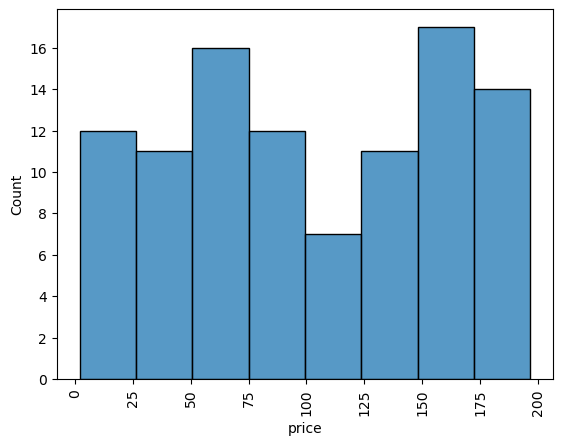

In [32]:
sns.histplot(data=products, x="price")
plt.xticks(rotation=90)
plt.show()

## Exercici 2

Dues variable numèrica.

In [6]:
transactions['timestamp'] = pd.to_datetime(transactions['timestamp'])

In [7]:
year_2021 = transactions[transactions['timestamp'].dt.year == 2021].copy()

In [8]:
year_2021['month'] = year_2021['timestamp'].dt.month

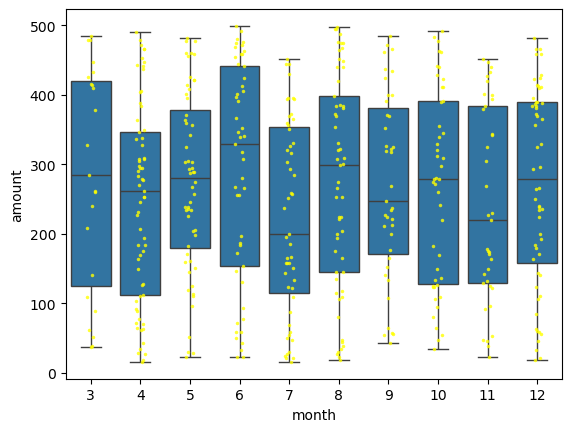

In [9]:
ax= sns.boxplot(data=year_2021, x='month', y='amount')
ax= sns.stripplot(data=year_2021, x='month', y='amount', color='yellow', alpha=0.8, size=2.5)

## Exercici 3

Una variable categòrica.

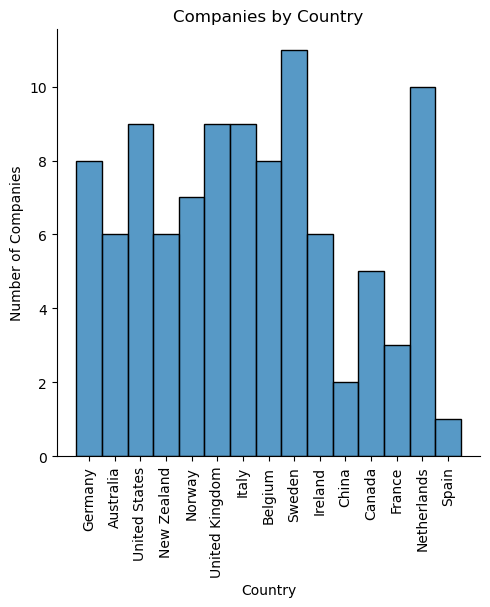

In [10]:
sns.displot(companies['country'])
plt.xticks(rotation=90)
plt.title('Companies by Country')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.show()


## Exercici 4

Una variable categòrica i una numèrica.


In [11]:
join_comp_trans = pd.merge(companies, transactions, how='left', left_on='company_id', right_on='business_id')

In [12]:
join_group = join_comp_trans.groupby('company_name')['amount'].sum().reset_index()

In [13]:
join_group = join_group.rename(columns={'amount': 'total_amount'})

In [14]:
join_group = join_group.sort_values(by='total_amount', ascending=False)
top_10 = join_group.head(10)
top_10

,company_name,total_amount
74,Nunc Interdum Incorporated,25622.65
97,Ut Semper Foundation,16150.24
54,Malesuada PC,15013.93
36,Enim Condimentum Ltd,14616.05
49,Lorem Eu Incorporated,14280.65
16,Arcu LLP,14116.04
68,Non Institute,8911.24
33,Eget Ipsum Ltd,946.15
70,Non Magna LLC,936.69
87,Sed Id Limited,922.42


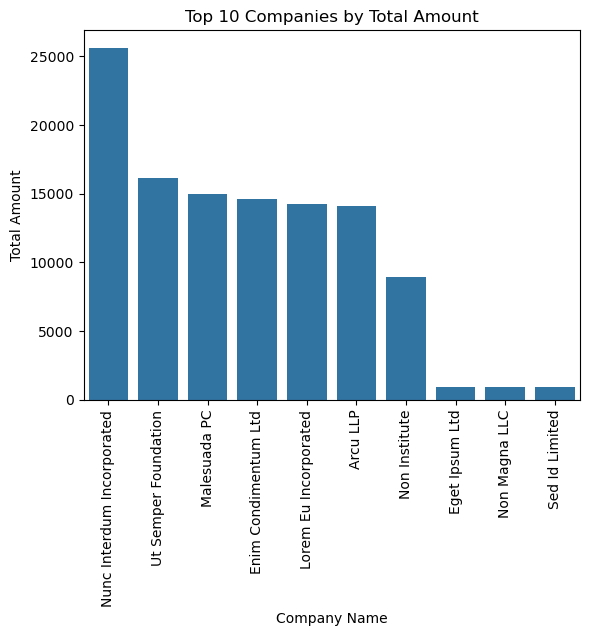

In [15]:
sns.barplot(data=top_10, x='company_name', y='total_amount')
plt.xticks(rotation=90)
plt.title('Top 10 Companies by Total Amount')
plt.xlabel('Company Name')
plt.ylabel('Total Amount')
plt.show()

## Exercici 5

Dues variables categòriques.

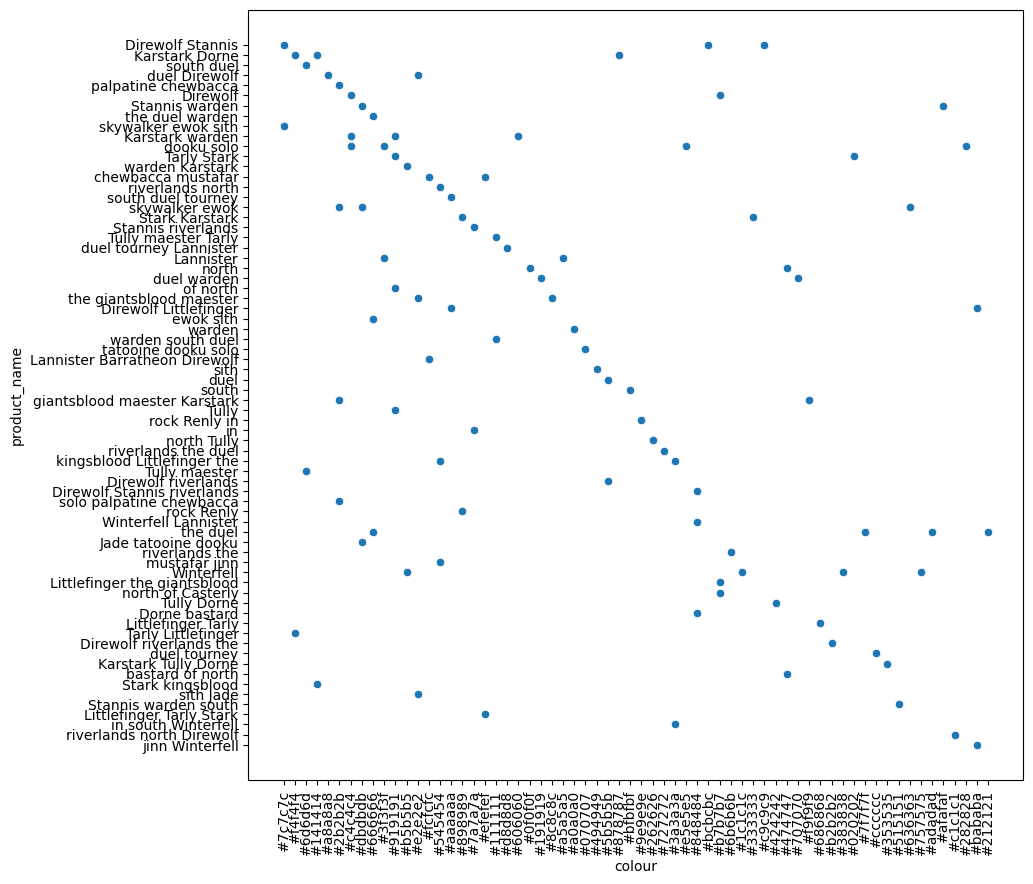

In [16]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=products["colour"], y=products["product_name"])
plt.xticks(rotation=90)
plt.show()

## Exercici 6

Tres variables.

In [17]:
year_2021

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,month
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,8
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,7
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381,158.2980,10
5,07A46D48-31A3-7E87-65B9-0DA902AD109F,CcU-3225,b-2386,2021-06-28 21:11:42,340.87,1,"47, 23",272,38.8342,92.1905,6
6,09DE92CE-6F27-2BB7-13B5-9385B2B3B8E2,CcU-3071,b-2298,2021-05-11 20:40:06,303.05,1,"67, 7",275,71.1706,10.5757,5
...,...,...,...,...,...,...,...,...,...,...,...
579,FAC76A80-8448-69AA-E892-426C2F12621C,CcU-4576,b-2278,2021-05-30 21:10:55,304.95,0,"79, 41, 7",210,-70.6476,178.5940,5
580,FBD7E0D6-BA6B-F5BC-0CA9-EA4B8760100C,CcU-3281,b-2418,2021-04-29 14:17:50,207.09,1,"97, 83, 29",272,83.6756,-77.4352,4
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.8605,-172.3460,6
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.0751,-142.2420,11


In [18]:
year_2021['declined_amount'] = 0.0
year_2021.loc[year_2021['declined'] == 1, 'declined_amount'] = year_2021['amount']
data_sum = year_2021.groupby('month')[['amount', 'declined_amount']].sum()#.reset_index()
data_sum


,amount,declined_amount
month,,
3,6471.66,760.31
4,15980.23,2472.55
5,15364.17,3704.90
6,14241.19,3423.38
7,11373.93,1442.16
8,15608.04,1707.80
9,10503.32,978.89
10,12281.17,1515.60
11,8888.91,1213.17


<Axes: xlabel='Month'>

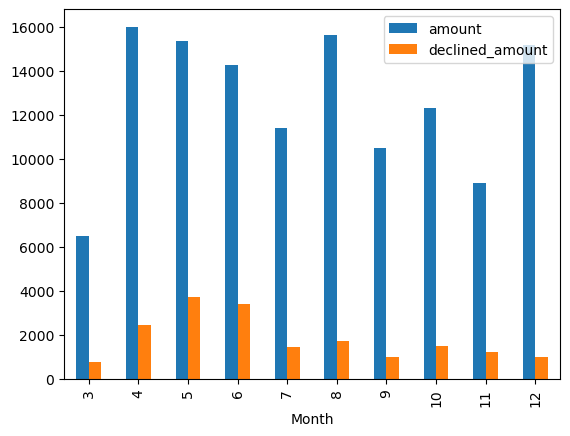

In [19]:
year_2021.groupby('month')[['amount', 'declined_amount']].sum().plot.bar(xlabel = "Month")

In [20]:
# print(data_sum.to_string())
# print(year_2021.to_string())
# plt.stackplot(data_sum['month'], data_sum['amount'], data_sum['declined_amount'], labels=['amount', 'declined'])
# plt.plot(data_sum['amount'], data_sum['declined_amount'])

<Axes: xlabel='month'>

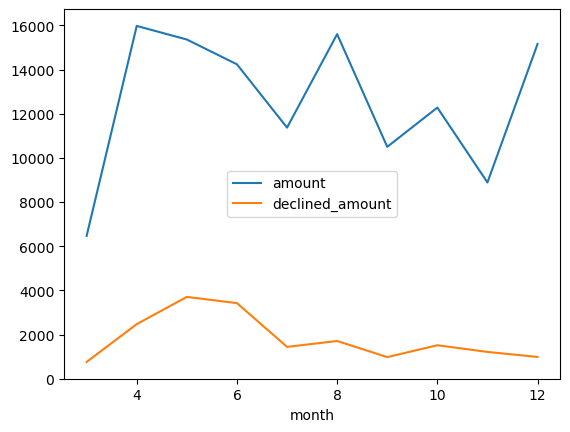

In [21]:
data_sum.plot.line()

## Exercici 7

Graficar un Pairplot.

In [22]:
products_inter = transactions[['id', 'product_ids']].copy()
products_inter['product_ids'] = products_inter['product_ids'].str.split(',') #divide the string into a list	
products_inter = products_inter.explode('product_ids') #separate the list into rows
products_inter['product_ids'] = products_inter['product_ids'].astype(int)


In [23]:
products['price'] = products['price'].astype(float)
products['weight'] = products['weight'].astype(float)

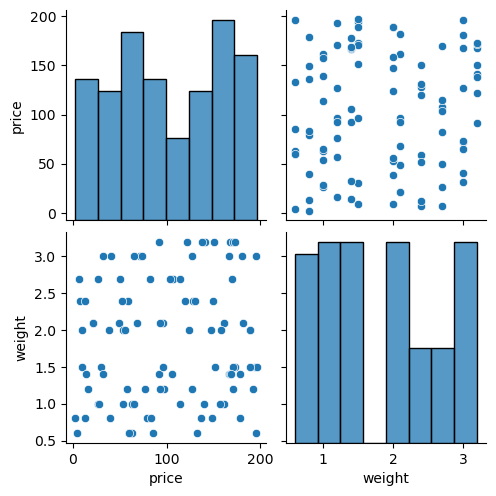

In [24]:
sns.pairplot(products)
plt.show()


## Nivell 2

## Exercici 1
Correlació de totes les variables numèriques.






In [25]:
print(products.dtypes)
print(transactions.dtypes)
print(user.dtypes)
print(companies.dtypes)
print(credit_cards.dtypes)
print(products_inter.dtypes)

id               object
product_name     object
price           float64
colour           object
weight          float64
warehouse_id     object
dtype: object
id                     object
card_id                object
business_id            object
timestamp      datetime64[ns]
amount                float64
declined                int64
product_ids            object
user_id                 int64
lat                   float64
longitude             float64
dtype: object
id              int64
name           object
surname        object
phone          object
email          object
birth_date     object
country        object
city           object
postal_code    object
address        object
dtype: object
company_id      object
company_name    object
phone           object
email           object
country         object
website         object
dtype: object
id               object
user_id          object
iban             object
pan              object
pin               int64
cvv               int6

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

<Axes: >

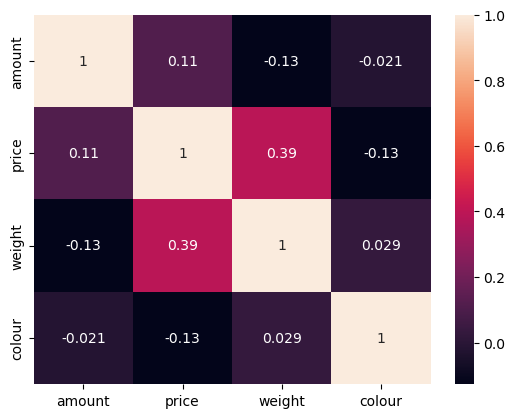

In [27]:

merged_data = pd.merge(transactions, products, how='left', left_on='product_ids', right_on='id') 
merged_data = pd.merge(merged_data, user, how='left', left_on='user_id', right_on='id')
merged_data = pd.merge(merged_data, companies, how='left', left_on='business_id', right_on='company_id')
merged_data = pd.merge(merged_data, credit_cards, how='left', left_on='card_id', right_on='id', suffixes=('_x1', '_y1'))

merged_data["colour"] = le.fit_transform(merged_data['colour']) #Asigno una etiqueta a cada uno de los colores
sns.heatmap(merged_data[["amount", "price", "weight", "colour"]].corr(method='spearman'), annot=True)
# merged_data.select_dtypes(include = "number").corr()

## Exercici 2

Implementa un jointplot.

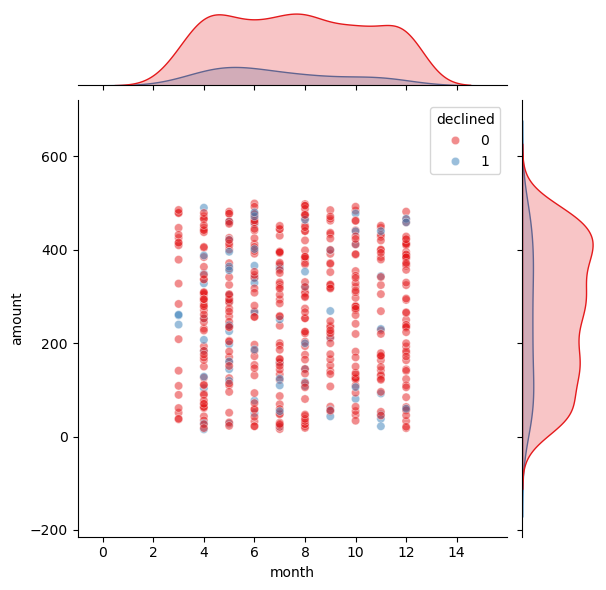

In [28]:
# year_2021.groupby(["month"])[["amount"]].mean().plot.jointplot()
# sns.jointplot(year_2021.groupby(["month"])[["amount"]].mean())
sns.jointplot(data=year_2021, x='month', y='amount', hue='declined', kind='scatter', alpha=0.5, palette='Set1')
plt.show() 

# Nivell 3

## Exercici 1

Implementa un violinplot combinat amb un altre tipus de gràfic.

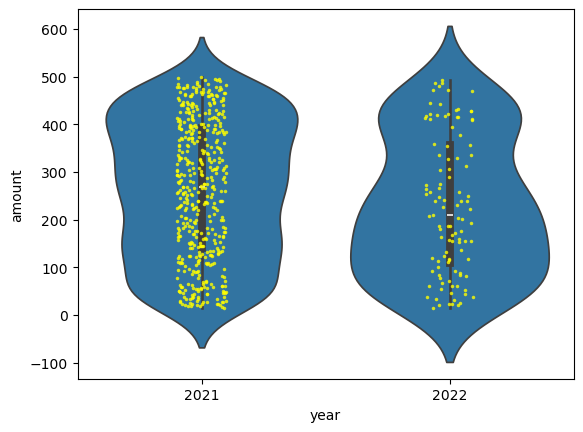

In [29]:
transactions['year'] = transactions['timestamp'].dt.year
a = sns.violinplot(data=transactions, x='year', y='amount')
a = sns.stripplot(data=transactions, x='year', y='amount', color='yellow', alpha=0.8, size=2.5)


## Exercici 2

Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000001B757E8FBC0>>

<Figure size 1200x600 with 0 Axes>

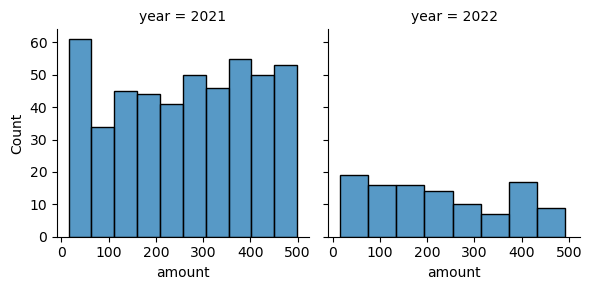

In [30]:
plt.figure(figsize=(12, 6))
sns.FacetGrid(data=transactions, col='year').map(sns.histplot, "amount").add_legend